     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...
Index(['tweet_id', 'sentiment', 'content'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB
None
           tweet_id
count  4.000000e+04
mean   1.845184e+09
std    1.188579e+08
min    1.693956e+09
25%    1.751431e+0

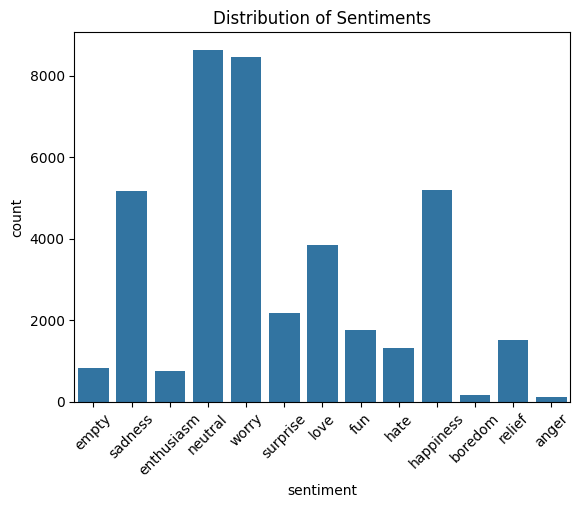

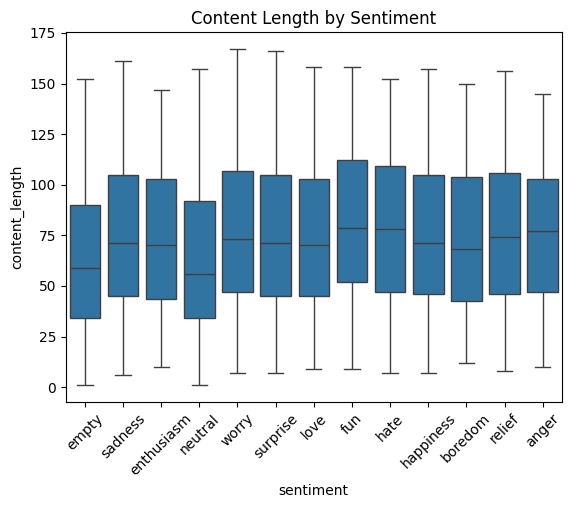

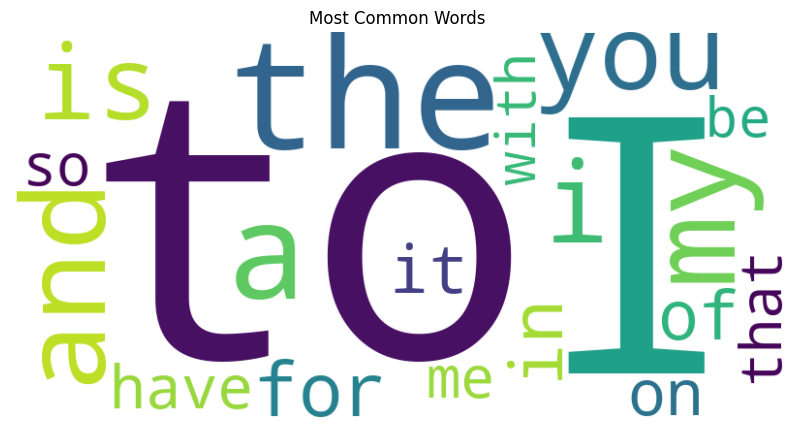

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


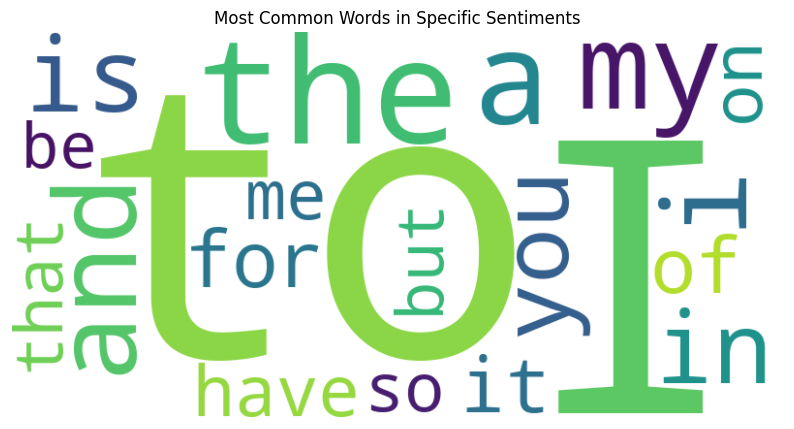

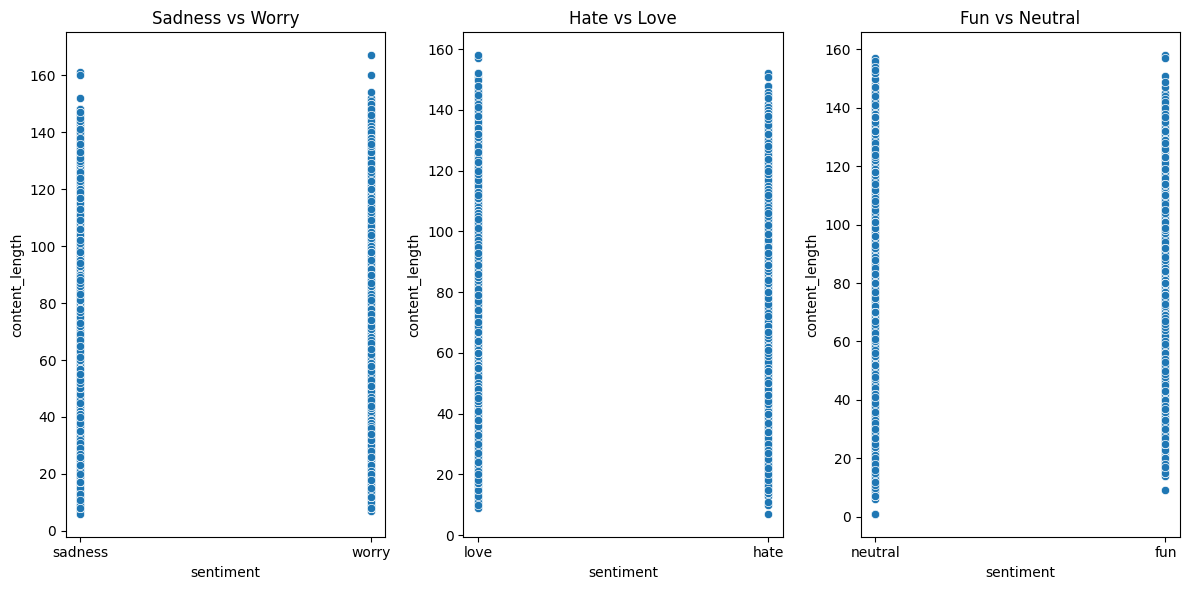

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud 

df = pd.read_csv("tweet_emotions.csv")

print(df.head())

print(df.columns)

print(df.info())

print(df.describe())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xticks(rotation=45) 
plt.show()

df['content_length'] = df['content'].apply(len)
sns.boxplot(x='sentiment', y='content_length', data=df)
plt.title('Content Length by Sentiment')
plt.xticks(rotation=45)
plt.show()

specific_sentiments = df[df['sentiment'].isin(['sadness', 'worry', 'hate', 'fun'])]
specific_sentiments = specific_sentiments.copy()

all_text = ' '.join(df['content'])
words = all_text.split()
word_freq = Counter(words)
common_words = word_freq.most_common(20)
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words')
plt.axis('off')
plt.show()

print(df['sentiment'].unique())
specific_sentiments = df[df['sentiment'].isin(['sadness', 'worry', 'hate', 'fun'])]
all_text_specific = ' '.join(specific_sentiments['content'])
words_specific = all_text_specific.split()
word_freq_specific = Counter(words_specific)
common_words_specific = word_freq_specific.most_common(20)

wordcloud_specific = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words_specific))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_specific, interpolation='bilinear')
plt.title('Most Common Words in Specific Sentiments')
plt.axis('off')
plt.show()

specific_sentiments = df[df['sentiment'].isin(['sadness', 'worry', 'hate', 'love', 'fun', 'neutral'])]

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='sentiment', y='content_length', data=specific_sentiments[specific_sentiments['sentiment'].isin(['sadness', 'worry'])])
plt.title('Sadness vs Worry')

plt.subplot(1, 3, 2)
sns.scatterplot(x='sentiment', y='content_length', data=specific_sentiments[specific_sentiments['sentiment'].isin(['hate', 'love'])])
plt.title('Hate vs Love')

plt.subplot(1, 3, 3)
sns.scatterplot(x='sentiment', y='content_length', data=specific_sentiments[specific_sentiments['sentiment'].isin(['fun', 'neutral'])])
plt.title('Fun vs Neutral')

plt.tight_layout()
plt.show()


# def word_tokenize(text):
#     return nltk.word_tokenize(text)
# df['tokens'] = df['content'].apply(word_tokenize)

# def generate_ngrams(tokens, n):
#     n_grams = ngrams(tokens, n)
#     return [' '.join(gram) for gram in n_grams]

# def plot_ngrams(sentiment, n, top_n=10):
#     specific_sentiment = df[df['sentiment'] == sentiment]
#     specific_tokens = specific_sentiment['tokens'].sum()  
#     ngrams_list = generate_ngrams(specific_tokens, n)
#     ngrams_freq = Counter(ngrams_list)
#     top_ngrams = ngrams_freq.most_common(top_n)
#     df_ngrams = pd.DataFrame(top_ngrams, columns=['N-gram', 'Frequency'])
#     df_ngrams.plot(kind='bar', x='N-gram', y='Frequency', title=f'Top {top_n} {n}-grams for {sentiment} Sentiment')

# plt.figure(figsize=(15, 6))
# plt.subplot(1, 2, 1)
# plot_ngrams('sadness', 2)
# plt.subplot(1, 2, 2)
# plot_ngrams('worry', 2)
# plt.tight_layout()
# plt.show()


# plt.figure(figsize=(15, 6))
# plt.subplot(1, 2, 1)
# plot_ngrams('hate', 3)
# plt.subplot(1, 2, 2)
# plot_ngrams('fun', 3)
# plt.tight_layout()
# plt.show()
